# Sessionization by both IP Address Only

,SessionID,SessionDate,SessionDuration,RequestCount,CompanyCount,UserAgentCount,UniqueMessageCount,OpenCount,ClickCount,UniqueLinkCount
0,1,2019-07-15 12:18:35.227000000,5,2,1,1,1,1,0,1
1,2,2019-07-15 12:31:07.650000000,5,2,1,1,1,1,0,1
2,3,2019-07-15 12:40:51.373000000,5,2,1,1,1,1,0,1
3,4,2019-07-15 12:49:08.533000000,5,2,1,1,1,1,0,1
4,5,2019-07-15 12:58:11.170000000,5,2,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
632311,632312,2019-07-15 12:33:58.753000000,5,2,1,1,1,1,0,1
632312,632313,2019-07-15 12:33:47.857000000,0,1,1,1,1,0,1,1
632313,632314,2019-07-15 12:27:30.770000000,5,2,1,1,1,1,0,1
632314,632315,2019-07-15 12:03:18.723000000,5,2,1,1,1,1,0,1


SessionID              int64
SessionDate           object
SessionDuration        int64
RequestCount           int64
CompanyCount           int64
UserAgentCount         int64
UniqueMessageCount     int64
OpenCount              int64
ClickCount             int64
UniqueLinkCount        int64
dtype: object


<Figure size 432x288 with 0 Axes>

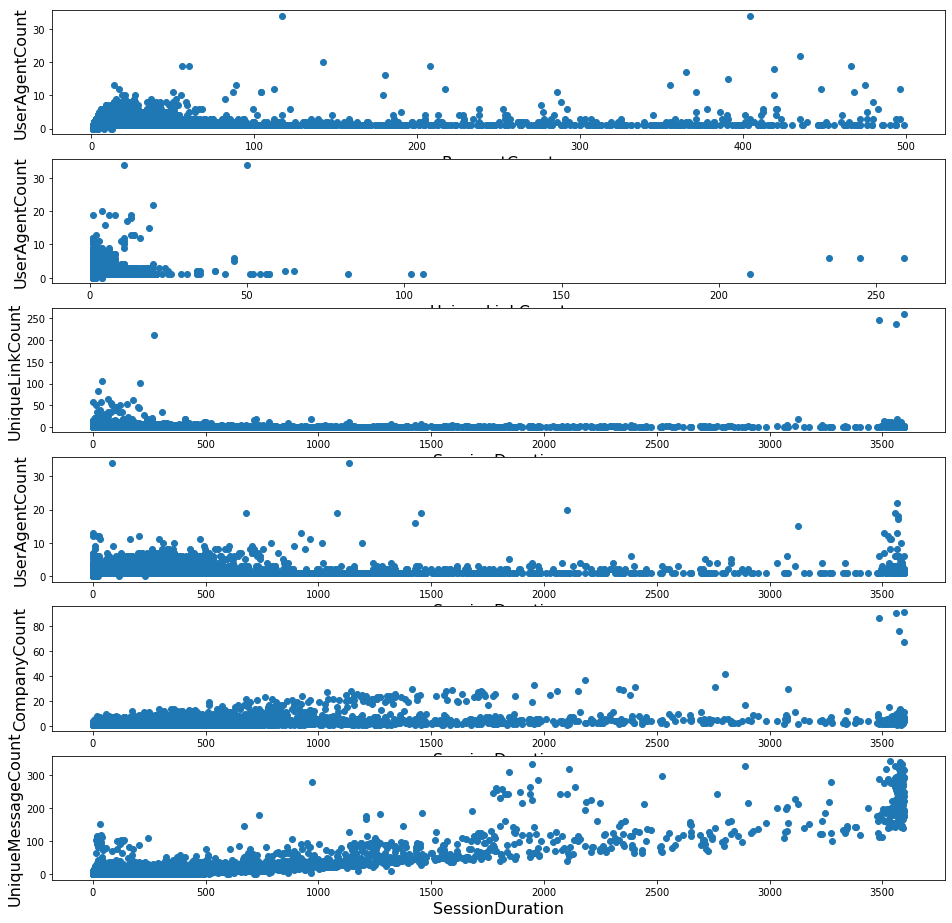

<Figure size 432x288 with 0 Axes>

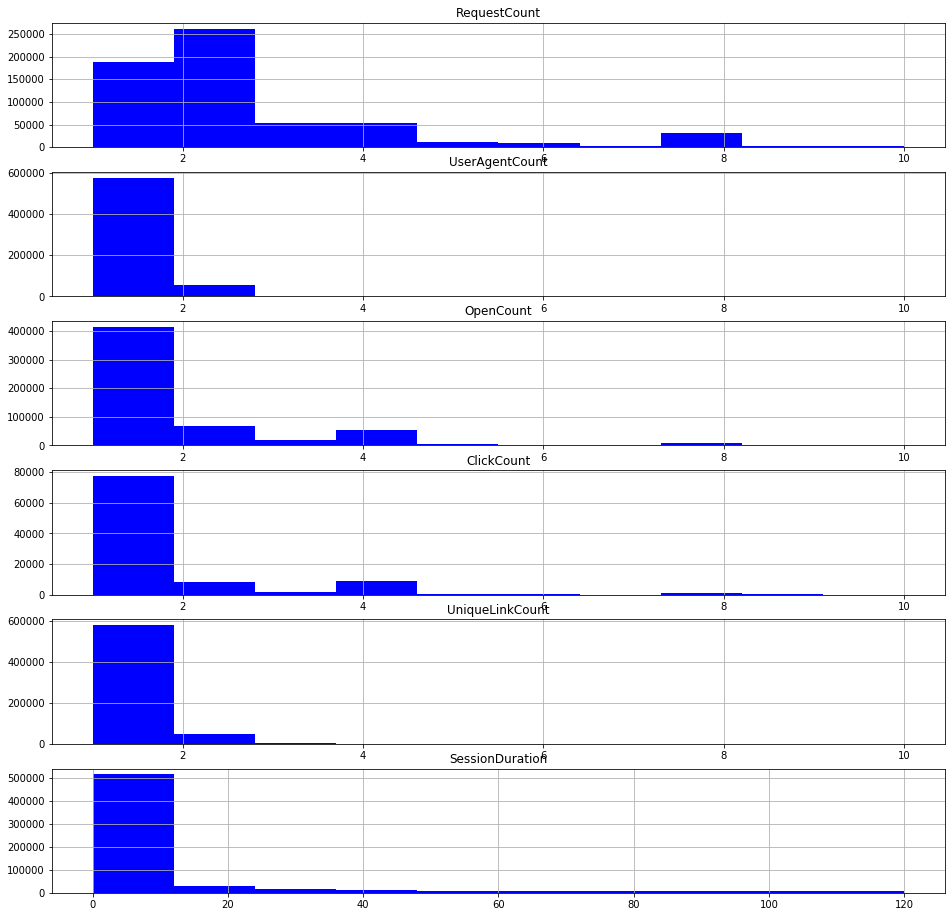

,SessionID,SessionDuration,RequestCount,CompanyCount,UserAgentCount,UniqueMessageCount,OpenCount,ClickCount,UniqueLinkCount
SessionID,1,0.00106623,0.00126783,-0.000200025,-0.000959716,0.00186259,0.0010149,0.00145092,0.00142415
SessionDuration,0.00106623,1,0.821855,0.504363,0.239369,0.863949,0.794571,0.0995678,0.146618
RequestCount,0.00126783,0.821855,1,0.463145,0.186796,0.895181,0.958452,0.212074,0.179578
CompanyCount,-0.000200025,0.504363,0.463145,1,0.249077,0.406068,0.453119,0.164778,0.248697
UserAgentCount,-0.000959716,0.239369,0.186796,0.249077,1,0.115195,0.136725,0.238663,0.336408
UniqueMessageCount,0.00186259,0.863949,0.895181,0.406068,0.115195,1,0.862149,0.139149,0.129104
OpenCount,0.0010149,0.794571,0.958452,0.453119,0.136725,0.862149,1,0.0121873,0.0314661
ClickCount,0.00145092,0.0995678,0.212074,0.164778,0.238663,0.139149,0.0121873,1,0.738968
UniqueLinkCount,0.00142415,0.146618,0.179578,0.248697,0.336408,0.129104,0.0314661,0.738968,1


In [2]:

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.cm as cm
from IPython.display import display

%matplotlib inline

df = pd.read_csv("C:/Users/ryoucis/Documents/EmailTrackingSessions_IPOnly.csv")

# Show dataframe
pd.options.display.max_columns = None
display(df) # show raw data
print(df.dtypes)

# Filter out outliers
df = df[df["RequestCount"] < 500]

# Show a few scatter
def SetScatterSubPlot(ax, X,Y):
    ax.set_xlabel(X, fontsize=16)
    ax.set_ylabel(Y, fontsize=16)
    ax.scatter(df[X], df[Y])

plt.clf()
fig, ax = plt.subplots(nrows=6, ncols=1, figsize = (16,16))    
SetScatterSubPlot(ax[0], "RequestCount", "UserAgentCount")
SetScatterSubPlot(ax[1], "UniqueLinkCount", "UserAgentCount")
SetScatterSubPlot(ax[2], "SessionDuration", "UniqueLinkCount")
SetScatterSubPlot(ax[3], "SessionDuration", "UserAgentCount")
SetScatterSubPlot(ax[4], "SessionDuration", "CompanyCount")
SetScatterSubPlot(ax[5], "SessionDuration", "UniqueMessageCount")
plt.show()

# Histos
def SetHistoSubPlot(ax, X, bins=10, range=(1,10)):
    ax.hist(df[X], bins=bins, range=range, color="blue")
    ax.set_title(X)
    ax.grid(True)
    ax.tick_params('both')

plt.clf()
fig, ax = plt.subplots(nrows=6, ncols=1, figsize = (16,16))

SetHistoSubPlot(ax[0], "RequestCount")
SetHistoSubPlot(ax[1], "UserAgentCount")
SetHistoSubPlot(ax[2], "OpenCount")
SetHistoSubPlot(ax[3], "ClickCount")
SetHistoSubPlot(ax[4], "UniqueLinkCount")
SetHistoSubPlot(ax[5], "SessionDuration", range=(0,120))
plt.show()


# Show dataframe corrlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


